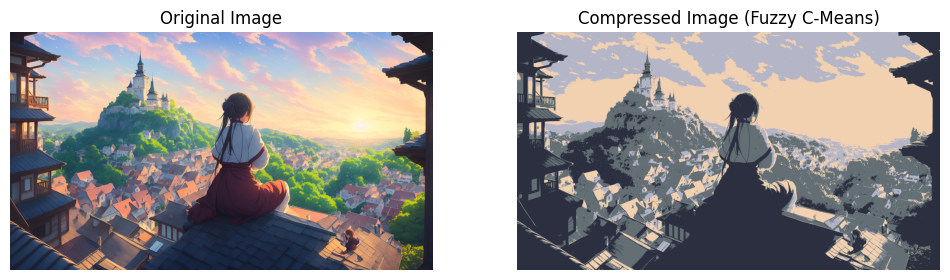

True

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skfuzzy as fuzz

# Function to do image compression using Fuzzy C-Means
def compress_image_fuzzy_cmeans(image, k, m=2.0, error=0.005, max_iter=1000):
    height, width, channels = image.shape
    image_reshaped = image.reshape(-1, 3).T  # Transpose for skfuzzy input format
    
    # Applying Fuzzy C-Means clustering
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        image_reshaped, c=k, m=m, error=error, maxiter=max_iter, init=None
    )
    
    # Find the cluster memberships
    labels = np.argmax(u, axis=0)
    
    # Replace pixel values with the cluster centers
    compressed_image_reshaped = cntr[labels].T
    compressed_image = compressed_image_reshaped.T.reshape(height, width, channels)
    
    # converting values to integers (0-255) and return the compressed image
    return np.clip(compressed_image.astype(np.uint8), 0, 255)

# Function to display original and compressed images side by side
def display_images(original, compressed):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[0].axis('off')
    
    ax[1].imshow(cv2.cvtColor(compressed, cv2.COLOR_BGR2RGB))
    ax[1].set_title(f"Compressed Image (Fuzzy C-Means)")
    ax[1].axis('off')
    
    plt.show()

# Loading image
image_path = r"C:\Users\amanm\Desktop\image-video-compression\data\images\Wallpaper.jpg"
image = cv2.imread(image_path)

# Compressing the image using Fuzzy C-Means clustering
k = 4  # Number of clusters
compressed_image = compress_image_fuzzy_cmeans(image, k)

# Display
display_images(image, compressed_image)

# Saving compressed image
compressed_image_path = 'compressed_image_fuzzy.jpg'
cv2.imwrite(compressed_image_path, compressed_image)


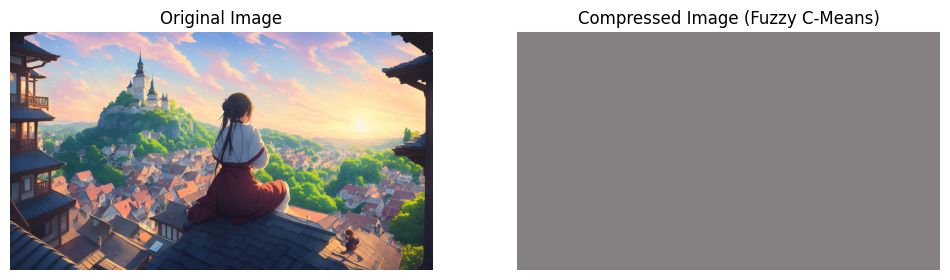

K = 1


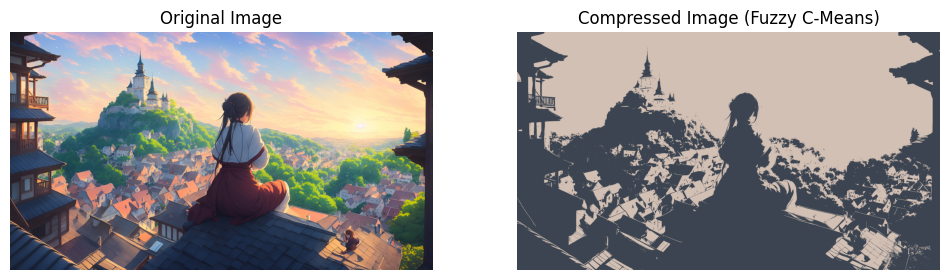

K = 2


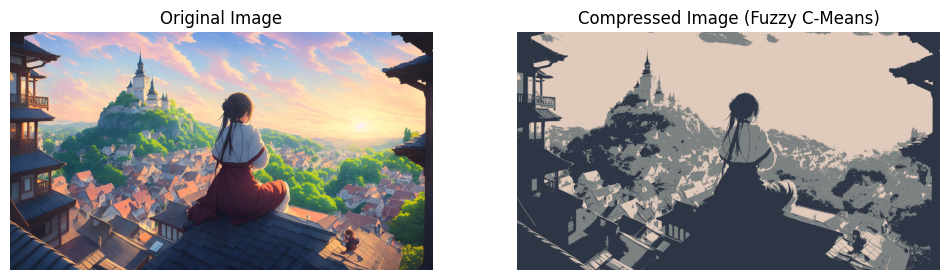

K = 3


KeyboardInterrupt: 

In [2]:
## this function will be using different k values starting from 2 to 32 and print result side by side.

def multiple_compression(image, k):
    for x in range(1,k+1):
        compressed_image = compress_image_fuzzy_cmeans(image, x)
        display_images(image, compressed_image)
        print(f"K = {x}")


multiple_compression(image, 32)

